In [1]:
#Imprting all the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Read the data
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Checking if there are any null values in the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<Figure size 5x5 with 0 Axes>

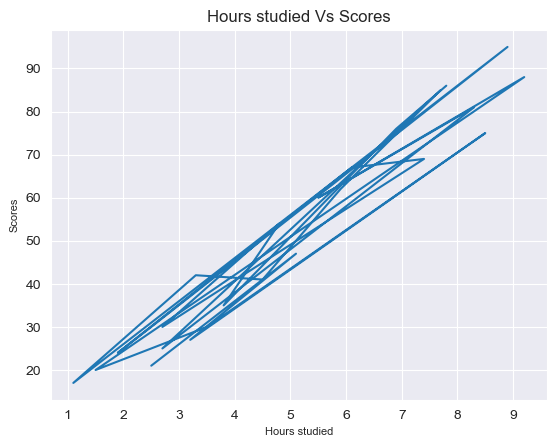

<Figure size 5x5 with 0 Axes>

In [14]:
#Plotting the distribution of scores
sns.set_style("darkgrid")
plt.plot(df["Hours"],df["Scores"])
plt.xlabel("Hours studied",size=8)
plt.ylabel("Scores",size=8)
plt.title("Hours studied Vs Scores", size=12)
plt.figure(figsize=(0.05,0.05))

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


<Figure size 5x5 with 0 Axes>

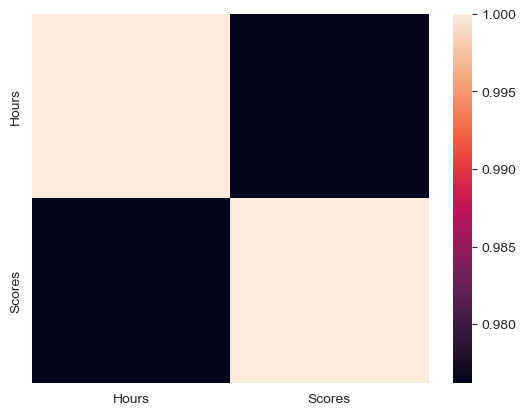

<Figure size 5x5 with 0 Axes>

In [5]:
#Correlation between the variables
print(df.corr())
sns.heatmap(df.corr())
plt.figure(figsize=(0.05,0.05))

### Preparing the Data

In [6]:
#Defining X and Y from the dataset
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [7]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                               test_size=0.2,
                                               random_state=0)
#Fitting the data in Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Text(0.5, 1.0, 'Hours studied Vs Scores')

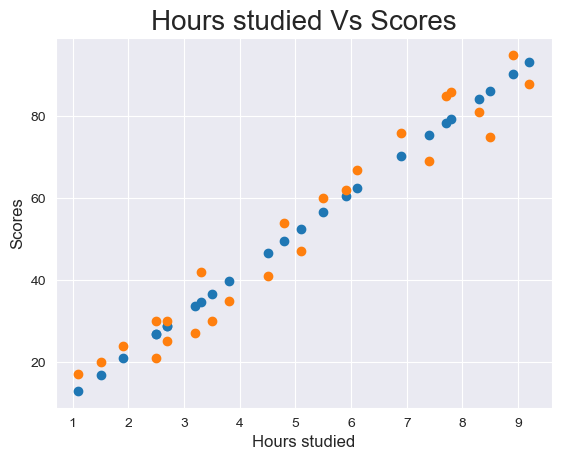

In [8]:
line=model.coef_*X+model.intercept_
plt.scatter(X,line)
plt.scatter(X,Y)
plt.xlabel("Hours studied",size=12)
plt.ylabel("Scores",size=12)
plt.title("Hours studied Vs Scores", size=20)

In [9]:
ypred=model.predict(X_test)
print(ypred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [10]:
df1=pd.DataFrame({'Actual': Y_test, 'Predicted': ypred})  
df1.head(10)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
hours = [9.25]
own_pred = model.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = [9.25]
Predicted Score = [93.69173249]


In [12]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, ypred)) 
print('R2_score:', 
      r2_score(Y_test, ypred))

Mean Absolute Error: 4.183859899002975
R2_score: 0.9454906892105356
